In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.rename(columns={'#Passengers':'Passengers'}, inplace = True)
data = data['Passengers']

In [4]:
type(data)

pandas.core.series.Series

In [5]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

In [6]:
data = np.array(data).reshape(-1, 1)

In [7]:
type(data)

numpy.ndarray

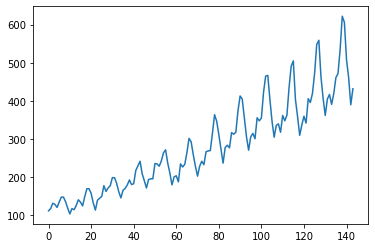

In [8]:
#let's plot our data
plt.plot(data)
plt.show()

## Scaling

In [9]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

## Train, Test Split

In [10]:
len(data)

144

In [11]:
train = data[0:100,:] # 100 train data
test = data[100:,:]  #44 test data

In [12]:
def get_data(data, steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), ]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
steps = 2

## Training and Testing

In [14]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)

In [15]:
#We are reshaping our datasets for use in LSTM model.
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [16]:
'''
We will use a Sequential Model with 2 hidden layers
Instead of neurons, LSTM networks have memory blocks that are connected through layers.
The default sigmoid activation function is used for the LSTM blocks.
'''
model = Sequential()
model.add(LSTM(128, input_shape = (1 ,steps))) #This is our first hidden layer with 128 memory blocks.
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67072     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, epochs = 25, batch_size =1)

Epoch 1/25
97/97 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 2/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 3/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 4/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 5/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 6/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 7/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 8/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 9/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 10/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 11/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 12/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 13/25
97/97 [==============================

In [19]:
y_prediction = model.predict(X_test)

In [20]:
y_prediction = scaler.inverse_transform(y_prediction)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

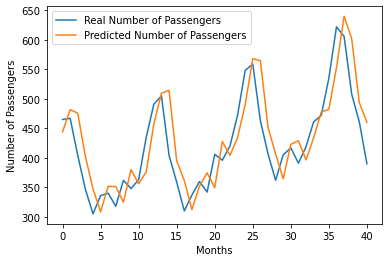

In [22]:
# Looking at results
plt.plot(y_test, label = 'Real Number of Passengers')
plt.plot(y_prediction, label = 'Predicted Number of Passengers')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()